In [1]:
from fgbuster import harmonic_ilc_alm
import healpy as hp
import pysm3
import pysm3.units as u
import sys
sys.path.append('../')
import curvedsky as cs
import cmb
from database import surveys,noise
import os
import numpy as np
from tqdm import tqdm
from utils import camb_clfile
import mpi
import matplotlib.pyplot as plt
import pickle as pl
from fgbuster import (CMB, Dust, Synchrotron,  # sky-fitting model
                      basic_comp_sep)

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG

In [3]:
outfolder = os.path.join(os.environ['SCRATCH'],"mar6")
infolder = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/'
dnside = 512
maskpath8 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits'
fwhm = 45
fg_dir = '/global/cscratch1/sd/lonappan/S4BIRD/FG'
fg_str = "s0d0"
table = "LITEBIRD_V1"
lmax= 1024
cl_lenf = '/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lensed_dls.dat'
cl_len = cmb.read_camb_cls(cl_lenf,ftype='lens',output='array')[:,:lmax+1]
sim = SimExperimentFG(infolder,outfolder,dnside,maskpath8,fwhm,fg_dir,fg_str,table,cl_lenf,which='hilc')

using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/mar6


In [4]:
sim.table

,level_0,index,frequency,depth_p,fwhm,bandwidth,pixel_size,detectors,net_det,net_arr_t,net_arr_p
0,0,0,40.0,37.42,70.5,0.30,18.0,114,172,18.0,25.5
1,1,1,50.0,33.46,58.5,0.30,18.0,114,96,11.5,16.3
2,2,2,60.0,21.31,51.1,0.23,18.0,114,79,9.5,13.5
3,3,3,68.0,16.87,47.1,0.23,18.0,114,64,7.8,11.0
4,4,4,78.0,12.07,43.8,0.23,18.0,114,54,6.5,9.2
5,5,5,89.0,11.30,41.5,0.23,18.0,114,47,5.6,8.0
6,6,6,100.0,6.56,37.8,0.23,12.0,296,59,4.4,6.2
7,7,7,119.0,4.58,33.6,0.30,12.0,222,42,3.7,5.2
8,8,8,140.0,4.79,30.8,0.30,12.0,296,38,2.8,4.0
9,9,9,166.0,5.57,28.9,0.30,12.0,222,36,3.1,4.4


In [11]:
e_nofg,b_nofg = sim.get_cinv_sim(0,True)

In [12]:
e_fg,b_fg = sim.get_cinv_sim(0)

/global/cscratch1/sd/lonappan/mar6/hilc_sims_fsky_0p8_0000.fits
Harmonic ILC


Making alms: 100%|██████████| 15/15 [10:10<00:00, 40.68s/Freq]


In [13]:
sim.which

'hilc'

/tmp/ipykernel_42753/381252666.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/cl_len[1,:])


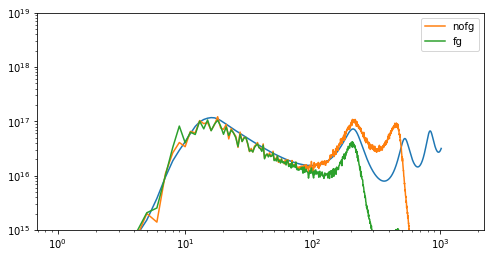

In [14]:
plt.figure(figsize=(8,4))
plt.loglog(1/cl_len[1,:])
plt.loglog(cs.utils.alm2cl(sim.lmax,e_nofg),label='nofg')
plt.loglog(cs.utils.alm2cl(sim.lmax,e_fg),label='fg')
plt.ylim(10**15,10**19)
plt.legend()

/tmp/ipykernel_42753/1843970430.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cs.utils.alm2cl(sim.lmax,b_fg)/cs.utils.alm2cl(sim.lmax,b_nofg),label='BB_Fg/BB_noFg')
/tmp/ipykernel_42753/1843970430.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cs.utils.alm2cl(sim.lmax,e_fg)/cs.utils.alm2cl(sim.lmax,e_nofg),label='BB_Fg/BB_noFg')
/tmp/ipykernel_42753/1843970430.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,400)


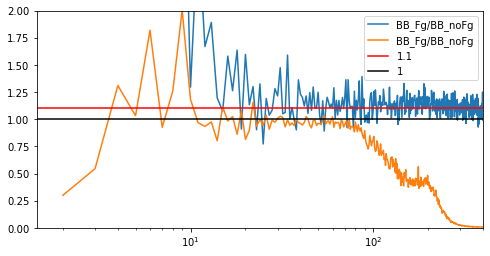

In [15]:
plt.figure(figsize=(8,4))
plt.plot(cs.utils.alm2cl(sim.lmax,b_fg)/cs.utils.alm2cl(sim.lmax,b_nofg),label='BB_Fg/BB_noFg')
plt.plot(cs.utils.alm2cl(sim.lmax,e_fg)/cs.utils.alm2cl(sim.lmax,e_nofg),label='BB_Fg/BB_noFg')
plt.semilogx()
plt.ylim(0,2)
plt.xlim(0,400)
plt.axhline(1.1,c='r',label='1.1')
plt.axhline(1,c='k',label='1')
plt.legend()

In [10]:
sim.fsky

0.7990690867106119

In [13]:
1.2*1.2

1.44

In [11]:
tlm,elm,blm = sim.get_comp_sep_alm(0)

/global/cscratch1/sd/lonappan/mar5/hilc_sims_fsky_0p8_0000.fits


In [12]:
tl,el,bl = sim.get_noFG_alms(0)

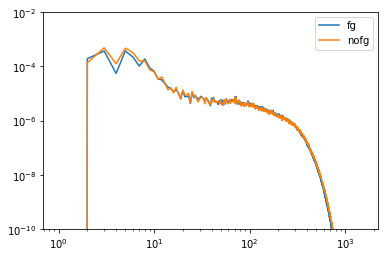

In [13]:
plt.loglog(hp.alm2cl(blm),label='fg')
plt.loglog(hp.alm2cl(bl),label='nofg')
plt.ylim(10**-10,None)
plt.legend()

In [30]:
np.rad2deg(sim.fwhm)*60

75.0

In [58]:
a = 75
b = 21
c = a/b

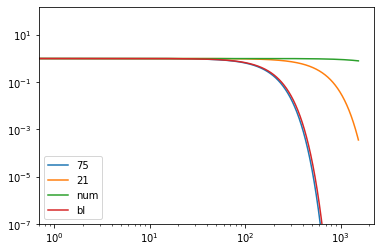

In [68]:
plt.loglog(hp.gauss_beam(np.radians(a/60),sim.lmax),label='75')
plt.loglog(hp.gauss_beam(np.radians(b/60),sim.lmax),label='21')
plt.loglog(hp.gauss_beam(np.radians(c/60),sim.lmax),label='num')
plt.loglog(hp.gauss_beam(np.radians(a/60),sim.lmax)/hp.gauss_beam(np.radians(b/60),sim.lmax),label='bl')
plt.ylim(10**-7,None)
plt.legend()